In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the dataset
diabetes_df = pd.read_csv('diabetes_dirty.csv')

In [3]:
# Display the first five observations
print("First five observations:")
print(diabetes_df.head())

First five observations:
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6  PROGRESSION
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87          151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69           75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85          141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89          206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80          135


In [4]:
# Separate features (X) and target variable (y)
X = diabetes_df.drop(columns=['PROGRESSION'])
y = diabetes_df['PROGRESSION']

In [5]:
# Generate training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Investigate the necessity for scaling or normalisation
print("\nSummary statistics of training set before scaling:")
print(X_train.describe())


Summary statistics of training set before scaling:
              AGE         SEX         BMI          BP          S1          S2  \
count  353.000000  353.000000  353.000000  353.000000  353.000000  353.000000   
mean    48.915014    1.470255   26.536827   94.989575  188.736544  114.924363   
std     12.755285    0.499823    4.386226   14.078076   34.729249   30.420845   
min     19.000000    1.000000   18.100000   62.000000  110.000000   41.600000   
25%     40.000000    1.000000   23.400000   84.000000  163.000000   94.600000   
50%     51.000000    1.000000   25.900000   93.000000  186.000000  112.800000   
75%     59.000000    2.000000   29.400000  105.000000  208.000000  132.800000   
max     79.000000    2.000000   41.300000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6  
count  353.000000  353.000000  353.000000  353.000000  
mean    49.519830    4.080453    4.654751   91.716714  
std     12.777917    1.295082    0.524686   11.680

In [7]:
# Apply MinMaxScaler and StandardScaler
# MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax_scaled = min_max_scaler.fit_transform(X_train)
X_test_minmax_scaled = min_max_scaler.transform(X_test)

In [8]:
# StandardScaler
standard_scaler = StandardScaler()
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)


In [9]:
# Generate a multiple linear regression model using the training set
model = LinearRegression()
model.fit(X_train_standard_scaled, y_train)


LinearRegression()

In [10]:
# Print out the intercept and coefficients of the trained model
print("\nIntercept:", model.intercept_)
print("Coefficients:", model.coef_)



Intercept: 153.7365439093484
Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


In [11]:
# Generate predictions for the test set
y_pred = model.predict(X_test_standard_scaled)


In [12]:
# Compute R-squared for your model on the test set
r2 = r2_score(y_test, y_pred)
print("\nR-squared:", r2)


R-squared: 0.45260276297191926


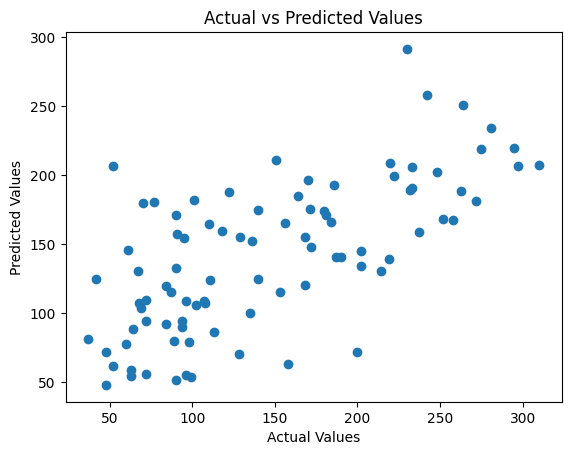

In [13]:
# Plotting the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [14]:
# Ensure the Notebook includes comments about what my code is accomplishing
print("\nThe R-squared value indicates the proportion of variance in the dependent variable 'PROGRESSION' that can be explained by the independent variables in the model. A higher R-squared value indicates a better fit for the model.")


The R-squared value indicates the proportion of variance in the dependent variable 'progression' that can be explained by the independent variables in the model. A higher R-squared value indicates a better fit for the model.
